# Yolov11-small fine tuning

**Model_performance:**

Precision(B): 0.97

Recall(B):0.98

map@50:0.99

map@50-95:0.77

Dataset link: https://universe.roboflow.com/mikrostar-tech/liveness-detection-itdp4/dataset/16


**Load dataset**

In [ ]:
!pip install ultralytics   # install yolo framework
!pip install roboflow   # computer vision data sources
!pip install pillow_heif>=0.10.0
#!pip install roboflow==1.1.10

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 107.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2cNMZIjZTGCchFnDDbbp")
project = rf.workspace("mikrostar-tech").project("liveness-detection-itdp4")
version = project.version(16)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to liveness-detection-16 in yolov11:: 100%|██████████| 11504/11504 [00:01<00:00, 8831.55it/s]


**fine-tuning**

In [ ]:
from ultralytics import YOLO

# Create a directory for your models in Drive
import os
os.makedirs('/content/drive/MyDrive/efficientnet_livness_detection_model', exist_ok=True)

# detection model for the detection dataset
model1 = YOLO('yolo11s.pt')  # Pretrained detection weights

results = model1.train(
    data='/content/liveness-detection-16/data.yaml',
    epochs= 50,
    imgsz=640,
    batch= 4 ,                 # Smaller batch
    lr0=0.0015,
    patience=15,             # Early Stopping
    copy_paste=0.1,
    degrees=10,              # Random rotation up to ±15 degrees
    mixup=0.1, # 20% probability of mixing two images and their labels
    scale= 0.5,   # Helps model detect objects at different sizes
    hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, # HSV color augmentation
    save_period=10,          # Saves model checkpoint every 10 epochs
    workers=0,  # ← Add this to reduce multiprocessing warnings


    optimizer='SGD',
    weight_decay=0.0005,
    momentum=0.937,
    close_mosaic=10,
    plots= True,
    val=True,



    # Save to Google Drive
    project='/content/drive/MyDrive/efficientnet_livness_detection_model/yolomodels',  # Main project folder
    name='training 3',                  # Run name
    save=True,
    save_txt=True,  # Save predictions as txt files
    save_conf=True  # Save confidence scores
)

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/liveness-detection-16/data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0015, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=training 32, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=15, perspective=0.0, pl

**Test the model**

Using sample image: /content/liveness-detection-16/test/images/9_6-avi_25_fake_jpg.rf.da1cc803da5a977fdd9d071988ef7f21.jpg

image 1/1 /content/liveness-detection-16/test/images/9_6-avi_25_fake_jpg.rf.da1cc803da5a977fdd9d071988ef7f21.jpg: 640x640 1 spoof, 552.4ms
Speed: 2.6ms preprocess, 552.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


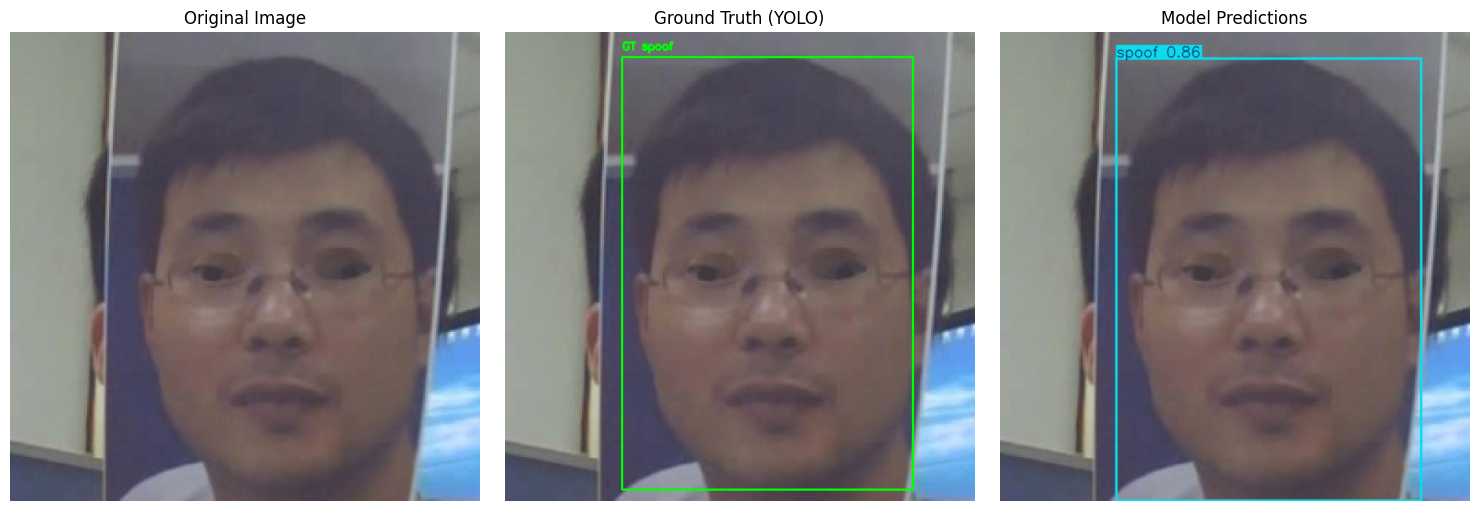

Image: 9_6-avi_25_fake_jpg.rf.da1cc803da5a977fdd9d071988ef7f21.jpg
Detected objects: 1
Segmentation masks: 0
Number of ground truth annotations (from TXT): 1
Annotation 1: 1 0.5578125 0.51484375 0.61875 0.9203125


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import random

# Load trained model
model = YOLO("/content/drive/MyDrive/efficientnet_livness_detection_model/yolomodels/training 32/weights/best.pt")

# Get test split images
test_images_dir = Path("/content/liveness-detection-16/test/images")
test_images = list(test_images_dir.glob("*.jpg")) + list(test_images_dir.glob("*.png"))

if not test_images:
    print(f"Error: No images found in {test_images_dir}")
else:
    # Random sample image
    sample_image = random.choice(test_images)
    print(f"Using sample image: {sample_image}")

    # Load original image
    img = cv2.imread(str(sample_image))
    if img is None:
        print(f"Error: Could not read image {sample_image}")
    else:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Use .txt label path (YOLO format)
        label_dir = Path("/content/liveness-detection-16/test/labels")
        label_path = label_dir / f"{sample_image.stem}.txt"
        gt_image = img_rgb.copy()

        try:
            with open(label_path, 'r') as f:
                h, w = img_rgb.shape[:2]
                class_names = ['real','spoof']

                for line in f.readlines():
                    parts = line.strip().split()
                    if len(parts) != 5:
                        continue  # Skip invalid lines

                    class_id, x_center, y_center, box_width, box_height = map(float, parts)

                    # Convert normalized to pixel coordinates
                    x_center *= w
                    y_center *= h
                    box_width *= w
                    box_height *= h

                    x1 = int(x_center - box_width / 2)
                    y1 = int(y_center - box_height / 2)
                    x2 = int(x_center + box_width / 2)
                    y2 = int(y_center + box_height / 2)

                    # Draw rectangle
                    cv2.rectangle(gt_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

                    # Add label text
                    label_name = class_names[int(class_id)] if int(class_id) < len(class_names) else f"class_{int(class_id)}"
                    cv2.putText(gt_image, f"GT {label_name}", (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        except FileNotFoundError:
            print(f"Ground truth file not found: {label_path}")
            gt_image = img_rgb.copy()
            cv2.putText(gt_image, "No Ground Truth File", (50, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        # Run prediction
        results = model.predict(source=str(sample_image), conf=0.5, save=False)

        if results and len(results) > 0:
            pred_image = results[0].plot()
            pred_image = cv2.cvtColor(pred_image, cv2.COLOR_BGR2RGB)

            # Show comparison plot
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))

            axes[0].imshow(img_rgb)
            axes[0].set_title("Original Image")
            axes[0].axis('off')

            axes[1].imshow(gt_image)
            axes[1].set_title("Ground Truth (YOLO)")
            axes[1].axis('off')

            axes[2].imshow(pred_image)
            axes[2].set_title("Model Predictions")
            axes[2].axis('off')

            plt.tight_layout()
            plt.show()

            # Print prediction info
            r = results[0]
            print(f"Image: {sample_image.name}")
            print(f"Detected objects: {len(r.boxes) if r.boxes else 0}")
            print(f"Segmentation masks: {len(r.masks) if r.masks else 0}")

            # Print number of GT boxes (from .txt file)
            try:
                with open(label_path, 'r') as f:
                    lines = f.readlines()
                    print(f"Number of ground truth annotations (from TXT): {len(lines)}")
                    for i, line in enumerate(lines):
                        print(f"Annotation {i+1}: {line.strip()}")
            except Exception as e:
                print(f"Error reading GT TXT file: {e}")

        else:
            print("Model prediction failed.")


Model loaded successfully from /content/drive/MyDrive/efficientnet_livness_detection_model/yolomodels/training 32/weights/best.pt
Loaded class names: ['real', 'spoof']
Found 576 test images.
Starting inference on test set...

Test results saved to: /content/yolo_test_results.csv


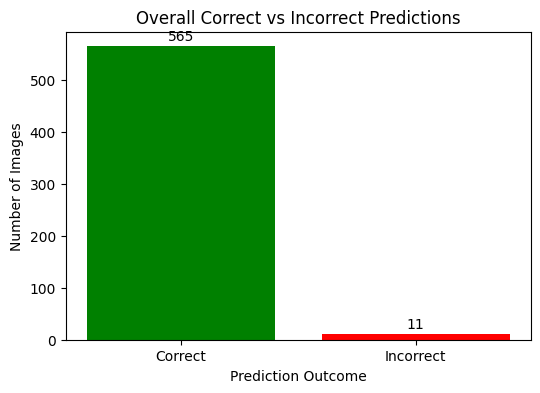


Analysis Complete.
Total images processed: 576
Correctly predicted images (set match): 565
Accuracy (set match): 0.9809
Results DataFrame head:


,image_path,ground_truth_labels,predicted_labels,is_correct_match
0,/content/liveness-detection-16/test/images/scr...,spoof,spoof,True
1,/content/liveness-detection-16/test/images/96_...,real,real,True
2,/content/liveness-detection-16/test/images/FT7...,spoof,spoof,True
3,/content/liveness-detection-16/test/images/1_m...,spoof,spoof,True
4,/content/liveness-detection-16/test/images/ID_...,spoof,spoof,True


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import os
import yaml

# Load trained model
# Assuming the best model is saved at this path
model_path = "/content/drive/MyDrive/efficientnet_livness_detection_model/yolomodels/training 32/weights/best.pt"
try:
    model = YOLO(model_path)
    print(f"Model loaded successfully from {model_path}")
except Exception as e:
    print(f"Error loading model from {model_path}: {e}")
    model = None # Set model to None if loading fails

if model is not None:
    # Get test split paths
    dataset_dir = "/content/liveness-detection-16"
    test_images_dir = Path(dataset_dir) / "test" / "images"
    test_labels_dir = Path(dataset_dir) / "test" / "labels"

    # Get class names from data.yaml
    data_yaml_path = Path(dataset_dir) / 'data.yaml'
    try:
        with open(data_yaml_path, 'r') as f:
            data_config = yaml.safe_load(f)
        class_names = data_config.get('names', [])
        print(f"Loaded class names: {class_names}")
    except FileNotFoundError:
        print(f"Error: data.yaml not found at {data_yaml_path}")
        class_names = []
    except Exception as e:
        print(f"Error loading data.yaml: {e}")
        class_names = []


    # List all image files in the test set
    image_files = list(test_images_dir.glob("*.jpg")) + list(test_images_dir.glob("*.png")) + \
                  list(test_images_dir.glob("*.jpeg")) + list(test_images_dir.glob("*.bmp"))

    if not image_files:
        print(f"Error: No images found in {test_images_dir}")
    else:
        print(f"Found {len(image_files)} test images.")

        results_list = []
        ground_truth_counts = {name: 0 for name in class_names}
        predicted_counts = {name: 0 for name in class_names}
        correct_predictions_count = 0
        total_predictions_count = 0

        print("Starting inference on test set...")

        # Iterate through each test image
        for image_path in image_files:
            image_name = image_path.name
            label_path = test_labels_dir / f"{image_path.stem}.txt"

            # Get ground truth labels from .txt file
            gt_labels = []
            if label_path.exists():
                with open(label_path, 'r') as f:
                    for line in f.readlines():
                        parts = line.strip().split()
                        if len(parts) > 0:
                            try:
                                class_id = int(parts[0])
                                if 0 <= class_id < len(class_names):
                                    gt_labels.append(class_names[class_id])
                                    ground_truth_counts[class_names[class_id]] += 1
                                else:
                                     print(f"Warning: Unknown class ID {class_id} in {label_path}")
                            except ValueError:
                                print(f"Warning: Could not parse class ID in line: {line} in {label_path}")
            else:
                # If no label file, assume no objects of interest are present (background image)
                # This might need adjustment based on your dataset's annotation style
                print(f"Warning: No ground truth label file found for {image_name}. Assuming no objects.")


            # Run inference
            try:
                results = model.predict(source=str(image_path), conf=0.25, save=False, verbose=False) # Lower confidence for more detections

                if results and len(results) > 0:
                    r = results[0]
                    predicted_labels = []
                    if r.boxes is not None:
                        for box in r.boxes:
                            try:
                                class_id = int(box.cls)
                                if 0 <= class_id < len(class_names):
                                    predicted_label = class_names[class_id]
                                    predicted_labels.append(predicted_label)
                                    predicted_counts[predicted_label] += 1
                                else:
                                    print(f"Warning: Unknown predicted class ID {class_id} for {image_name}")
                            except ValueError:
                                print(f"Warning: Could not parse predicted class ID for {image_name}")

                    # Compare predictions with ground truth
                    # This comparison logic assumes one object per image or focuses on presence/absence
                    # A more sophisticated comparison would involve matching bounding boxes (e.g., using IoU)
                    is_correct = set(predicted_labels) == set(gt_labels)
                    if is_correct:
                         correct_predictions_count += 1
                    total_predictions_count += 1 # Count each image as one prediction attempt

                    results_list.append({
                        'image_path': str(image_path),
                        'ground_truth_labels': ", ".join(gt_labels), # Join multiple labels if needed
                        'predicted_labels': ", ".join(predicted_labels), # Join multiple labels if needed
                        'is_correct_match': is_correct # Simple match: do sets of labels match?
                    })
                else:
                     print(f"Warning: No inference results for {image_name}")
                     results_list.append({
                        'image_path': str(image_path),
                        'ground_truth_labels': ", ".join(gt_labels),
                        'predicted_labels': "No detection",
                        'is_correct_match': False
                    })

            except Exception as e:
                print(f"Error during inference for {image_name}: {e}")
                results_list.append({
                    'image_path': str(image_path),
                    'ground_truth_labels': ", ".join(gt_labels),
                    'predicted_labels': "Error during inference",
                    'is_correct_match': False
                })


        # Create results DataFrame
        results_df = pd.DataFrame(results_list)

        # Save results to CSV
        output_csv_path = "/content/yolo_test_results.csv"
        results_df.to_csv(output_csv_path, index=False)
        print(f"\nTest results saved to: {output_csv_path}")

        # --- Visualizations ---

        # 1. Correct vs Incorrect Predictions Bar Chart
        outcome_counts = results_df['is_correct_match'].value_counts().reset_index()
        outcome_counts.columns = ['Outcome', 'Count']
        outcome_counts['Outcome'] = outcome_counts['Outcome'].map({True: 'Correct', False: 'Incorrect'})

        plt.figure(figsize=(6, 4))
        ax1 = plt.bar(outcome_counts['Outcome'], outcome_counts['Count'], color=['green', 'red'])
        plt.title('Overall Correct vs Incorrect Predictions')
        plt.xlabel('Prediction Outcome')
        plt.ylabel('Number of Images')
        for bar in ax1:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')
        plt.show()


        print("\nAnalysis Complete.")
        print(f"Total images processed: {len(image_files)}")
        print(f"Correctly predicted images (set match): {correct_predictions_count}")
        print(f"Accuracy (set match): {correct_predictions_count / total_predictions_count:.4f}")
        print(f"Results DataFrame head:")
        display(results_df.head())

**Displaying some images with incorrect predictions**


Found 11 images with incorrect predictions.

Displaying first 5 images with incorrect predictions:

Image: 79_jpg.rf.e7b9b6d2c10547e848c57a0760ed92a7.jpg
Ground Truth: spoof
Prediction: real, spoof


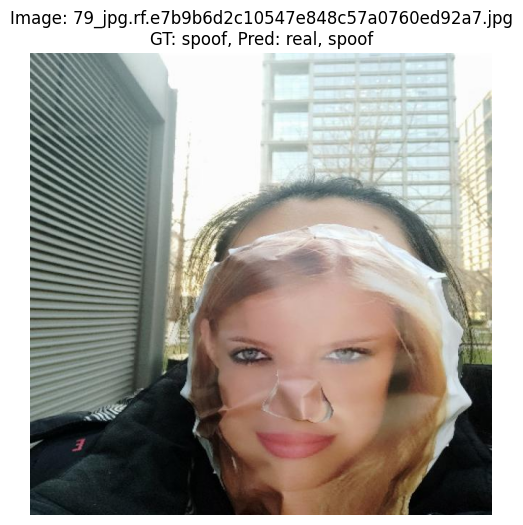


Image: 10_mp4-0000_jpg.rf.a70321b38db0c550fee141327203b573.jpg
Ground Truth: spoof
Prediction: spoof, real


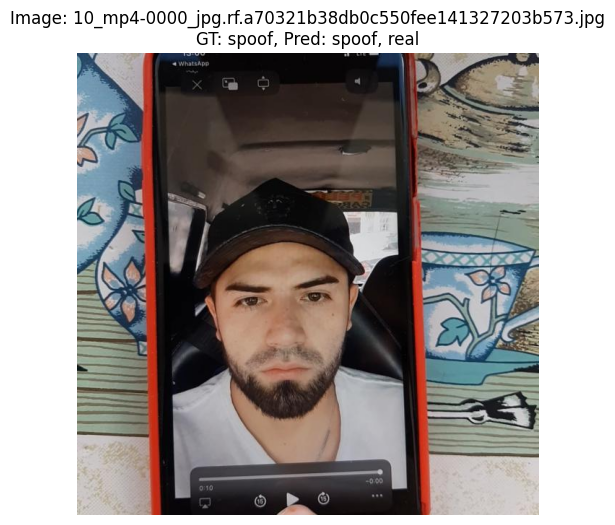


Image: salim_spoof_6_face_jpg.rf.53ed1cc240dda1b18b0706ad84adb787.jpg
Ground Truth: spoof
Prediction: 


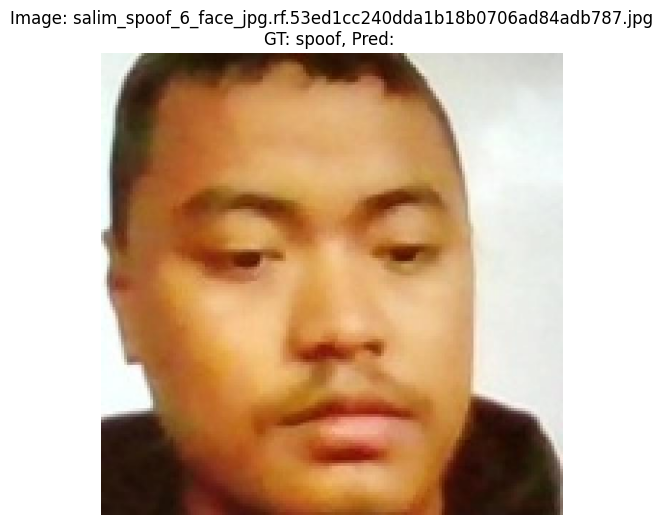


Image: abhishek_spoof_15_face_jpg.rf.fbbce70203646a84282d2a08e7012a04.jpg
Ground Truth: 
Prediction: spoof


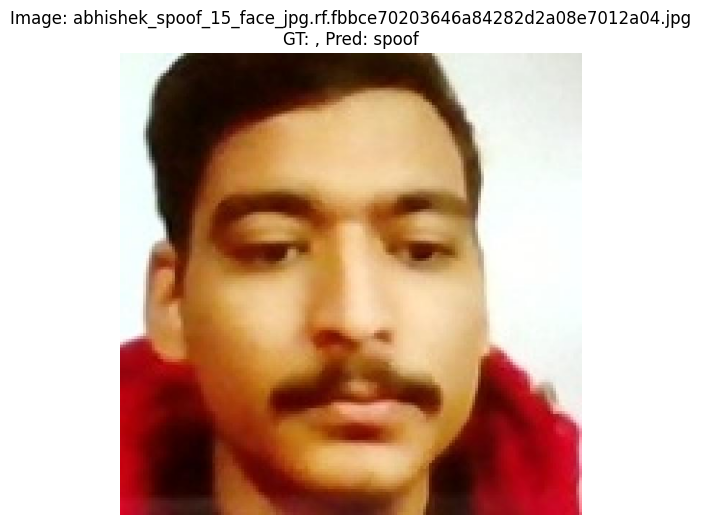


Image: 0001d815c0-6207d93b43afdc2f8d25853a_mp4-0000_jpg.rf.da6adb54e348e5794757a635302cf148.jpg
Ground Truth: real
Prediction: spoof


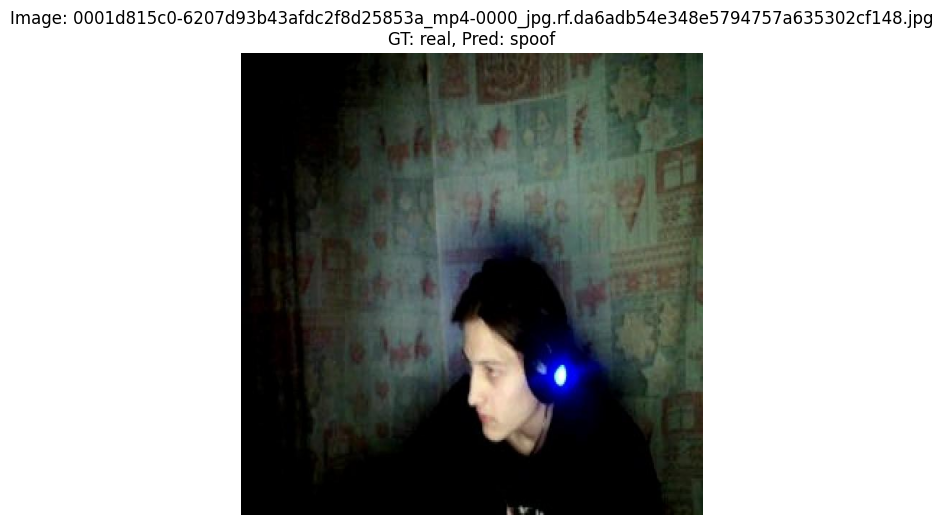

In [ ]:
# Extract images with incorrect predictions
incorrect_predictions_df = results_df[results_df['is_correct_match'] == False]

print(f"\nFound {len(incorrect_predictions_df)} images with incorrect predictions.")

# Display the first few incorrect predictions
if not incorrect_predictions_df.empty:
    print("\nDisplaying first 5 images with incorrect predictions:")
    for index, row in incorrect_predictions_df.head().iterrows():
        image_path = row['image_path']
        ground_truth = row['ground_truth_labels']
        prediction = row['predicted_labels']

        print(f"\nImage: {os.path.basename(image_path)}")
        print(f"Ground Truth: {ground_truth}")
        print(f"Prediction: {prediction}")

        # Load and display the image
        try:
            img = cv2.imread(image_path)
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.figure(figsize=(6, 6))
                plt.imshow(img_rgb)
                plt.title(f"Image: {os.path.basename(image_path)}\nGT: {ground_truth}, Pred: {prediction}")
                plt.axis('off')
                plt.show()
            else:
                print(f"Error: Could not load image {image_path}")
        except Exception as e:
            print(f"Error displaying image {image_path}: {e}")
else:
    print("No incorrect predictions found to display.")

**create class**

In [ ]:
!pip install ultralytics mediapipe retina-face seaborn matplotlib pandas opencv-python mtcnn ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.8 MB/s eta 0:00:00


In [ ]:
import cv2
import time
import numpy as np
from typing import Dict
import os
from ultralytics import YOLO

YOLO_MODEL = "/content/drive/MyDrive/efficientnet_livness_detection_model/yolomodels/training 32/weights/best.pt"

class FaceDetector:
    def __init__(self, threshold=0.25):
        """
        YOLO-based face detector and liveness classifier.
        """
        self.threshold = threshold
        if not os.path.exists(YOLO_MODEL):
            raise FileNotFoundError(f"YOLO model not found at {YOLO_MODEL}")
        self.detector = YOLO(YOLO_MODEL)

    def detect_and_classify(self, img: np.ndarray) -> Dict:
        """
        Detects faces and classifies them as real/spoof.
        Returns:
            {
                'status': 'real' or 'spoof' or 'no_face',
                'crop': np.ndarray (face image if real),
                'box': (x1, y1, x2, y2),
                'confidence': float,
                'inference_time': float
            }
        """
        start_time = time.time()

        if not isinstance(img, np.ndarray):
            raise TypeError("Input 'img' must be a numpy array (image data).")

        results = self.detector(img, verbose=False)
        boxes = results[0].boxes

        if boxes is None or len(boxes) == 0:
            return {
                "status": "no_face",
                "crop": None,
                "box": None,
                "confidence": 0.0,
                "inference_time": round(time.time() - start_time, 4)
            }

        h, w, _ = img.shape
        detections = []
        for box in boxes:
            conf = float(box.conf.item())
            if conf >= self.threshold:
                cls_idx = int(box.cls.item())
                label = results[0].names[cls_idx].lower()  # e.g. "real" or "spoof"
                x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
                x1, y1 = max(0, x1), max(0, y1)
                x2, y2 = min(w, x2), min(h, y2)
                crop = img[y1:y2, x1:x2]
                detections.append({
                    "label": label,
                    "confidence": conf,
                    "box": (x1, y1, x2, y2),
                    "crop": crop
                })

        if not detections:
            return {
                "status": "no_face",
                "crop": None,
                "box": None,
                "confidence": 0.0,
                "inference_time": round(time.time() - start_time, 4)
            }

        # Pick the face with highest confidence
        best_face = max(detections, key=lambda x: x['confidence'])
        status = best_face['label']

        if status == "spoof":
            # Stop the process
            print("⚠️ Spoof detected. Please provide another image.")
            return {
                "status": "spoof",
                "crop": None,
                "box": best_face['box'],
                "confidence": best_face['confidence'],
                "inference_time": round(time.time() - start_time, 4)
            }

        # Real face detected — pass to next step
        return {
            "status": "real",
            "crop": best_face['crop'],
            "box": best_face['box'],
            "confidence": best_face['confidence'],
            "inference_time": round(time.time() - start_time, 4)
        }


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


FaceDetector initialized successfully.

🧠 Detection Results for 0001e96803-6239bb2420237d576aade0ea__Moto-G30_mp4-0001_jpg.rf.dc6590a704969b4427c92bc387d16dbf.jpg:
Status: real
Confidence: 0.85
Inference Time: 0.1847 s


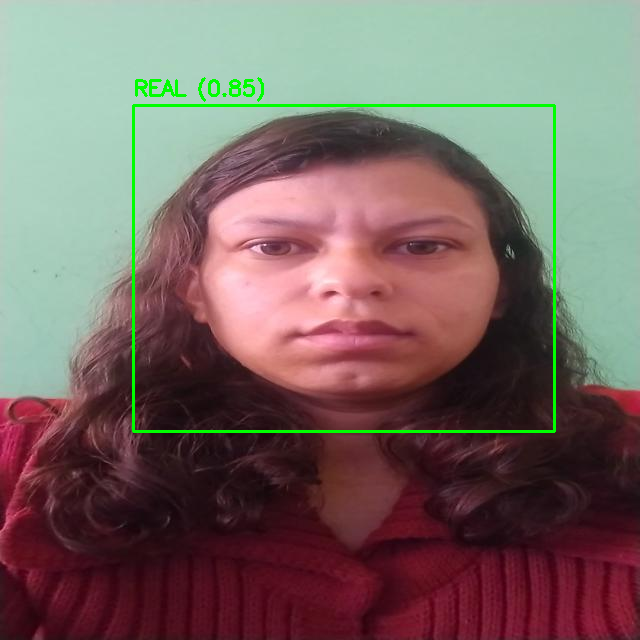


✅ Real face detected — ready for embedding step.


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import os

# Initialize the FaceDetector
try:
    face_detector = FaceDetector(threshold=0.25)
    print("FaceDetector initialized successfully.")
except Exception as e:
    print(f"Error initializing FaceDetector: {e}")
    face_detector = None

if face_detector:
    # Test image path
    sample_image_path = '/content/liveness-detection-16/test/images/0001e96803-6239bb2420237d576aade0ea__Moto-G30_mp4-0001_jpg.rf.dc6590a704969b4427c92bc387d16dbf.jpg'

    if os.path.exists(sample_image_path):
        img = cv2.imread(sample_image_path)

        if img is not None:
            # Detect and classify face
            result = face_detector.detect_and_classify(img)

            print(f"\n🧠 Detection Results for {os.path.basename(sample_image_path)}:")
            print(f"Status: {result['status']}")
            print(f"Confidence: {result['confidence']:.2f}")
            print(f"Inference Time: {result['inference_time']} s")

            # Draw results on image
            img_with_boxes = img.copy()

            if result['box'] is not None:
                x1, y1, x2, y2 = result['box']

                if result['status'] == "real":
                    color = (0, 255, 0)  # Green for real
                elif result['status'] == "spoof":
                    color = (0, 0, 255)  # Red for spoof
                else:
                    color = (255, 255, 0)  # Yellow for no face / unsure

                cv2.rectangle(img_with_boxes, (x1, y1), (x2, y2), color, 2)
                label = f"{result['status'].upper()} ({result['confidence']:.2f})"
                cv2.putText(img_with_boxes, label, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

            cv2_imshow(img_with_boxes)

            # Next-step logic
            if result['status'] == "real":
                print("\n✅ Real face detected — ready for embedding step.")
            elif result['status'] == "spoof":
                print("\n🚫 Spoof detected — please capture another image.")
            else:
                print("\n⚠️ No valid face detected.")
        else:
            print(f"Error: Could not read image from {sample_image_path}")
    else:
        print(f"Error: Sample image not found at {sample_image_path}")
